In [205]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

### Data Cleaning 

In [206]:

# Load the CSV file
df = pd.read_csv('Diabetes _classification.csv')

# Display the first few rows of the dataframe
df.head(10)


,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0
5,5,48,M,24,2.9,0.8,0.9,1.6,47.0,4.7,0
6,6,43,M,21,3.8,0.9,2.4,3.7,67.0,2.6,0
7,7,32,F,24,3.8,2.0,2.4,3.8,28.0,3.6,0
8,8,31,F,23,3.6,0.7,1.7,1.6,55.0,4.4,0
9,9,33,F,21,4.0,1.1,0.9,2.7,53.0,3.3,0


In [207]:
print(df.isnull().sum())


Unnamed: 0    0
Age           0
Gender        0
BMI           0
Chol          0
TG            0
HDL           0
LDL           0
Cr            0
BUN           0
Diagnosis     0
dtype: int64


In [208]:
# Replace 'f' and 'm' with 0 and 1
df['Gender'] = df['Gender'].replace({'f': 0, 'm': 1, 'F': 0, 'M': 1})

In [209]:
df.head(10)

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0
5,5,48,1,24,2.9,0.8,0.9,1.6,47.0,4.7,0
6,6,43,1,21,3.8,0.9,2.4,3.7,67.0,2.6,0
7,7,32,0,24,3.8,2.0,2.4,3.8,28.0,3.6,0
8,8,31,0,23,3.6,0.7,1.7,1.6,55.0,4.4,0
9,9,33,0,21,4.0,1.1,0.9,2.7,53.0,3.3,0


### EDA 

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   int64  
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 441.2 KB


In [211]:
df.describe()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,2565.500000,48.950312,0.634451,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,1481.625121,14.048794,0.481631,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,0.000000,20.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,1282.750000,36.000000,0.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,2565.500000,49.000000,1.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,3848.250000,59.000000,1.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,5131.000000,93.000000,1.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


In [212]:
#Print number of rows and columns 

print("No. of rows",df.shape[0])
print("No. of columns",df.shape[1])

No. of rows 5132
No. of columns 11


In [213]:
# Print the columns to identify the unnamed column
print(df.columns)

# Drop the unnamed column if it exists
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


Index(['Unnamed: 0', 'Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr',
       'BUN', 'Diagnosis'],
      dtype='object')


In [214]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0


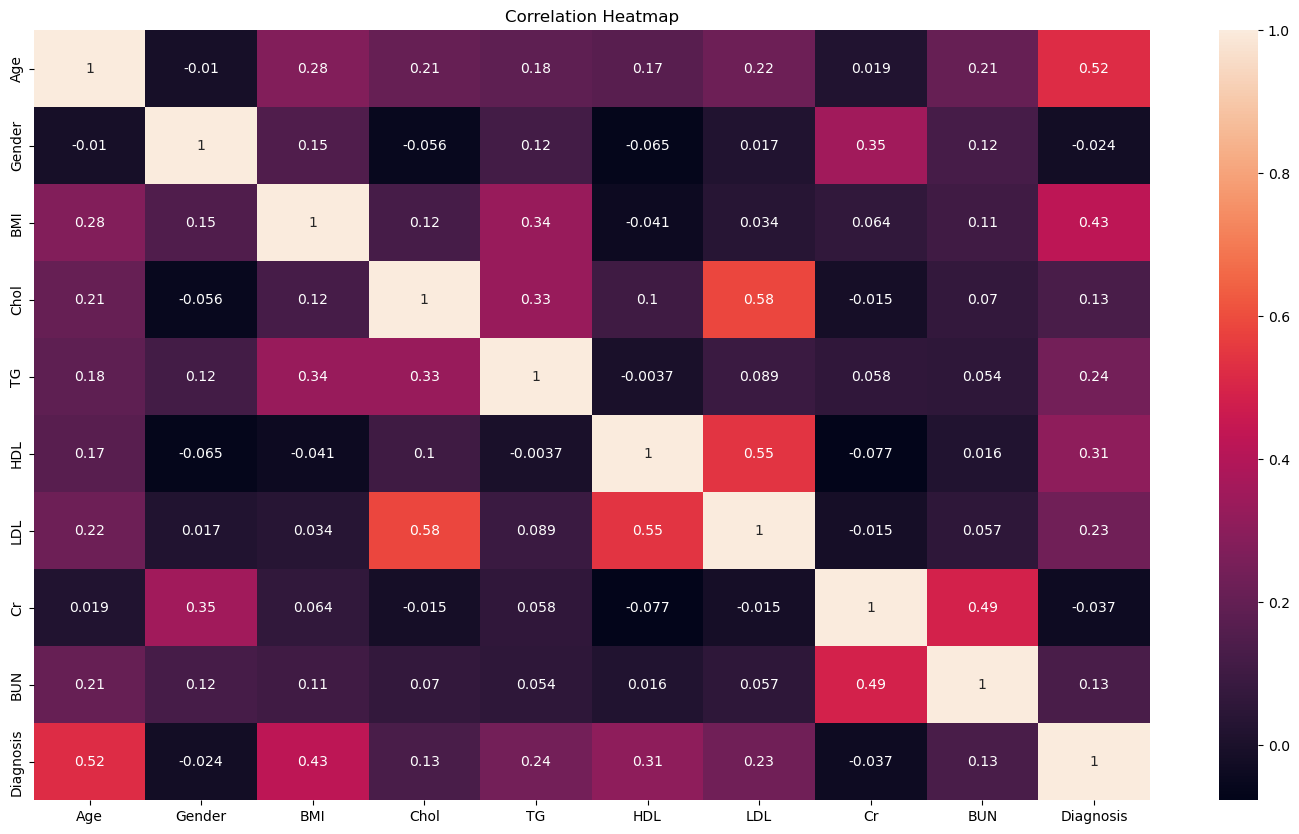

In [215]:
# Check correlation using a heat map

# Set up the matplotlib figure
plt.figure(figsize=(18,10))

# Create the heatmap
sns.heatmap(df.corr(),annot=True)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [216]:
# Check diagnostic counts 

df['Diagnosis'].value_counts()

0    3139
1    1993
Name: Diagnosis, dtype: int64

In [217]:
factor_dep=['BMI','Chol','TG','LDL','BUN']

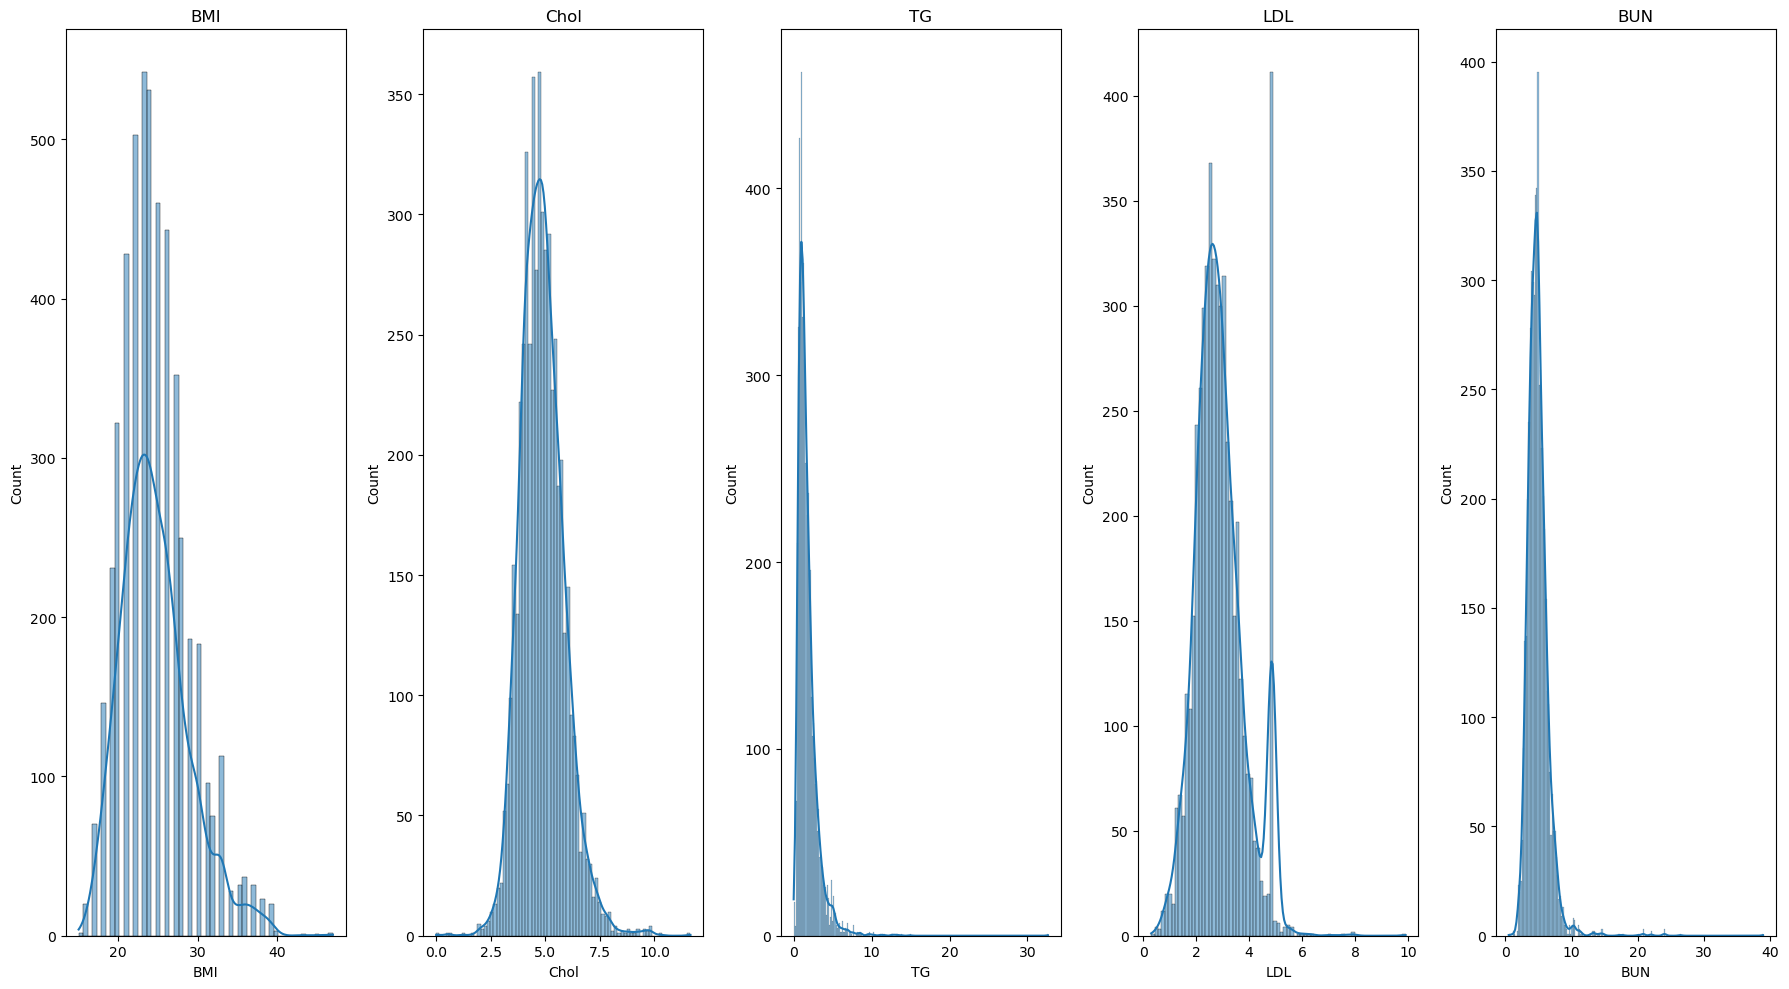

In [218]:


# Define the list of columns to plot
factor_dep = ['BMI', 'Chol', 'TG', 'LDL', 'BUN']

# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=len(factor_dep), figsize=(18, 10))

# Loop through each column and plot histogram with KDE
for i, column in enumerate(factor_dep):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()



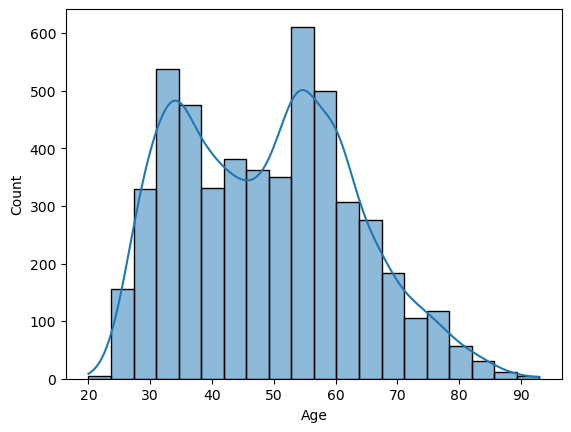

In [219]:
# Visualize age distribution 

sns.histplot(df['Age'],bins=20,kde=True)
plt.show()

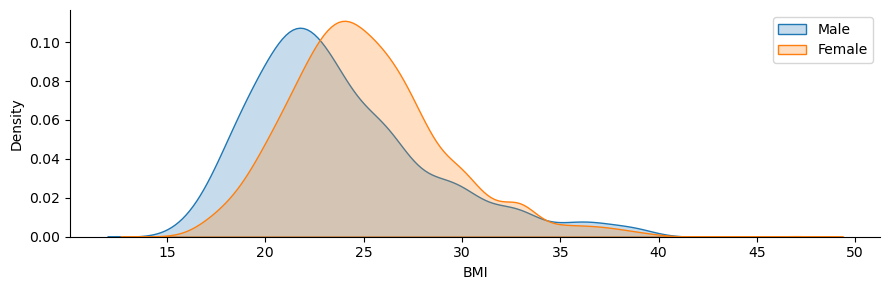

In [220]:
g=sns.FacetGrid(df,hue='Gender',aspect=3)
g.map(sns.kdeplot,'BMI',fill=True)
plt.legend(labels=['Male','Female'])
plt.show()

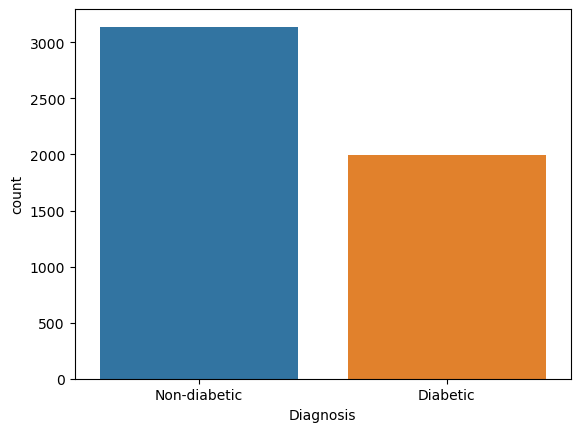

In [221]:
# Visualize diagnostic counts 

sns.countplot(x='Diagnosis',data=df)
plt.xticks([0,1],['Non-diabetic','Diabetic'])
plt.show()

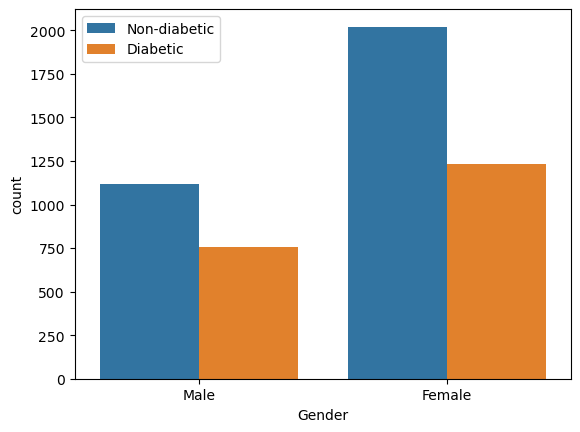

In [222]:
# Visualize diagnostic counts base on gender 

sns.countplot(x='Gender',hue='Diagnosis',data=df)
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['Non-diabetic','Diabetic'])
plt.show()

In [223]:
# Defining bin edges

bins = [0, 18.5, 25, 30, 100]
# Defining labels for bins

bin_names = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

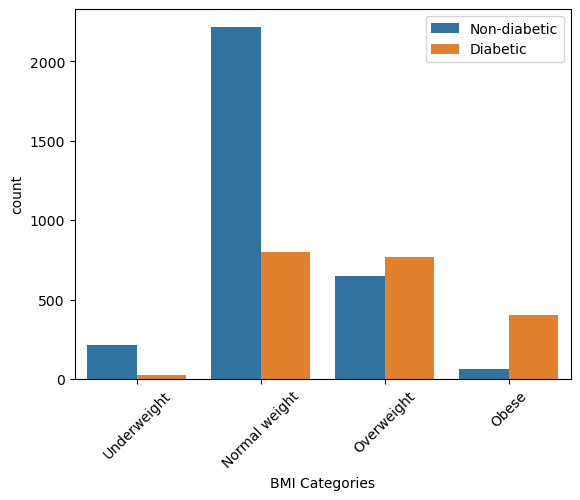

In [224]:
# Creating a new column with bin names

df['Weight_category'] = pd.cut(df['BMI'], bins=bins, labels=bin_names)
sns.countplot(x='Weight_category',hue='Diagnosis',data=df, order=bin_names)
plt.xlabel('BMI Categories')
plt.xticks(rotation=45)
plt.legend(labels=['Non-diabetic','Diabetic'])
plt.show()

In [225]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Weight_category
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0,Normal weight
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0,Normal weight
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0,Normal weight
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0,Normal weight
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0,Normal weight


### Splitting Data and selecting model

In [226]:
# Features and target
X = df.drop('Diagnosis', axis=1)  # 'Diagnosis' is the target column
y = df['Diagnosis']

In [227]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [228]:
# Define the column transformer
numeric_features = ['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']
categorical_features = ['Weight_category']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [229]:
('selector', SelectKBest(f_classif, k=10))


('selector', SelectKBest())

In [230]:


# Define a pipeline with preprocessing and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('scaler', StandardScaler()),  # Scale features
    ('selector', SelectKBest(f_classif, k=9)),  # Feature selection (ensure k <= n_features)
    ('classifier', LogisticRegression(max_iter=200))  # Initialize with logistic regression and increased max_iter
])


In [231]:
# Define parameter grids for different models
param_grid_lr = {
    'classifier': [LogisticRegression(max_iter=200)],
    'classifier__C': [0.1, 1, 10],
    'poly__degree': [1, 2, 3]
}

param_grid_rf = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'poly__degree': [1, 2]
}

param_grid_gb = {
    'classifier': [GradientBoostingClassifier()],
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'poly__degree': [1, 2]
}


In [232]:
# Make predictions
y_pred = best_model.predict(X_test)


In [233]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Cross-Validation Scores
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores)}')


Accuracy: 0.8208373904576436
Confusion Matrix:
[[540  64]
 [120 303]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       604
           1       0.83      0.72      0.77       423

    accuracy                           0.82      1027
   macro avg       0.82      0.81      0.81      1027
weighted avg       0.82      0.82      0.82      1027



Cross-Validation Accuracy Scores: [0.87341772 0.86368062 0.791423   0.76900585 0.79337232]
Average Cross-Validation Accuracy: 0.818179902856785
